<a href="https://colab.research.google.com/github/avi-0106/statistical_toolkit/blob/master/tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install statistical_tests==0.2.1

In [ ]:
from statistical_tests import ZTest, TTest, ANOVA, ChiSquareTest

In [ ]:
# Load real-world datasets
def load_datasets():
    # Iris dataset for parametric tests
    iris = load_iris()
    iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
    iris_df['species'] = iris.target  # 0=setosa, 1=versicolor, 2=virginica

    # Titanic dataset for chi-square test (verified working URL)
    titanic_url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
    titanic_df = pd.read_csv(titanic_url)

    return iris_df, titanic_df

In [ ]:
def main():
    # Load datasets
    iris_df, titanic_df = load_datasets()

    # ======================
    # 1. Z-Test Demonstrations
    # ======================
    print("\n" + "="*40)
    print("Z-TEST DEMONSTRATIONS")
    print("="*40)

    # 1. One-sample Z-test (two-tailed)
    setosa_sepal = iris_df[iris_df['species'] == 0]['sepal length (cm)'].values
    z_one_sample = ZTest(
        data1=setosa_sepal,
        population_mean=5.0,  # Hypothetical population mean
        sigma1=0.5,           # Known population std
        tail="two",
        alpha=0.05
    )
    print("\n1A. One-Sample Z-Test (Two-Tailed):")
    print(z_one_sample.run_test())
    z_one_sample.plot_test()

    # ======================
    # 2. T-Test Demonstrations
    # ======================
    print("\n" + "="*40)
    print("T-TEST DEMONSTRATIONS")
    print("="*40)

    # 2. Two-sample T-test (two-tailed)
    male_ages = titanic_df[titanic_df['Sex'] == 'male']['Age'].dropna().values
    female_ages = titanic_df[titanic_df['Sex'] == 'female']['Age'].dropna().values
    two_sample_ttest = TTest(
        data1=male_ages,
        data2=female_ages,
        tail="two",
        alpha=0.05
    )
    print("\n2A. Two-Sample T-Test (Two-Tailed):")
    print(two_sample_ttest.run_test())
    two_sample_ttest.plot_test()

    # ======================
    # 3. ANOVA Demonstration
    # ======================
    print("\n" + "="*40)
    print("ANOVA DEMONSTRATION")
    print("="*40)

    group1 = iris_df[iris_df['species'] == 0]['sepal length (cm)'].values
    group2 = iris_df[iris_df['species'] == 1]['sepal length (cm)'].values
    group3 = iris_df[iris_df['species'] == 2]['sepal length (cm)'].values

    anova_test = ANOVA(group1, group2, group3, alpha=0.05)
    print("\n3. ANOVA Results:")
    print(anova_test.run_test())
    anova_test.plot_test()

    # ======================
    # 4. Chi-Square Demonstration
    # ======================
    print("\n" + "="*40)
    print("CHI-SQUARE TEST DEMONSTRATION")
    print("="*40)

    contingency_table = pd.crosstab(
        titanic_df['Survived'],
        titanic_df['Sex'],
        rownames=['Survived'],
        colnames=['Sex']
    ).values

    chi_test = ChiSquareTest(contingency_table)
    print("\n4. Chi-Square Test Results:")
    print(chi_test.run_test())
    chi_test.plot_test()




Z-TEST DEMONSTRATIONS

1A. One-Sample Z-Test (Two-Tailed):
{'z_statistic': np.float64(0.08485281374238891), 'p_value': np.float64(0.932378405606689), 'alpha': 0.05}


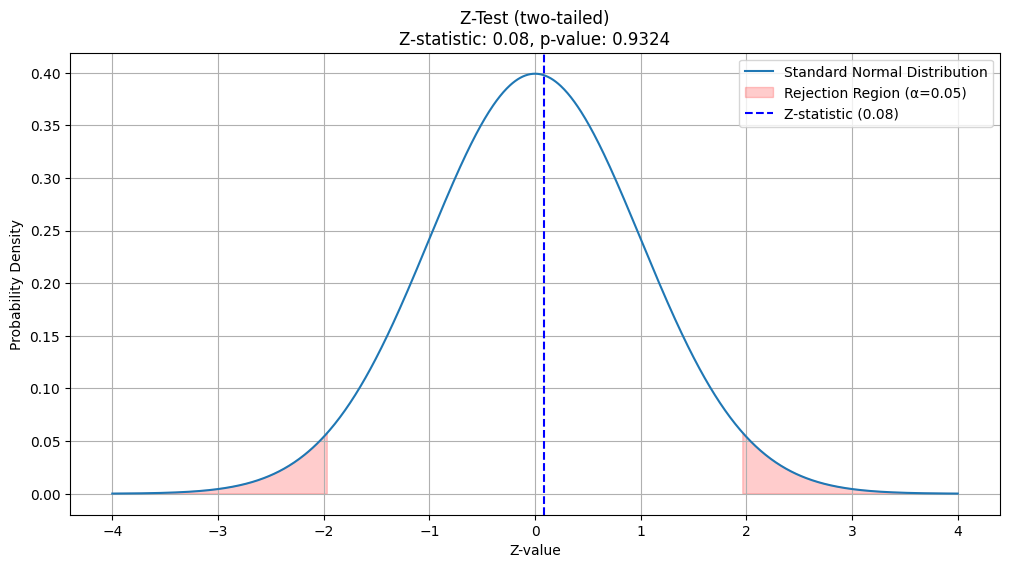


T-TEST DEMONSTRATIONS

2A. Two-Sample T-Test (Two-Tailed):
{'t_statistic': np.float64(2.5258975171938896), 'p_value': np.float64(0.011814913211889735), 'dof': np.float64(560.0505568947058), 'alpha': 0.05}


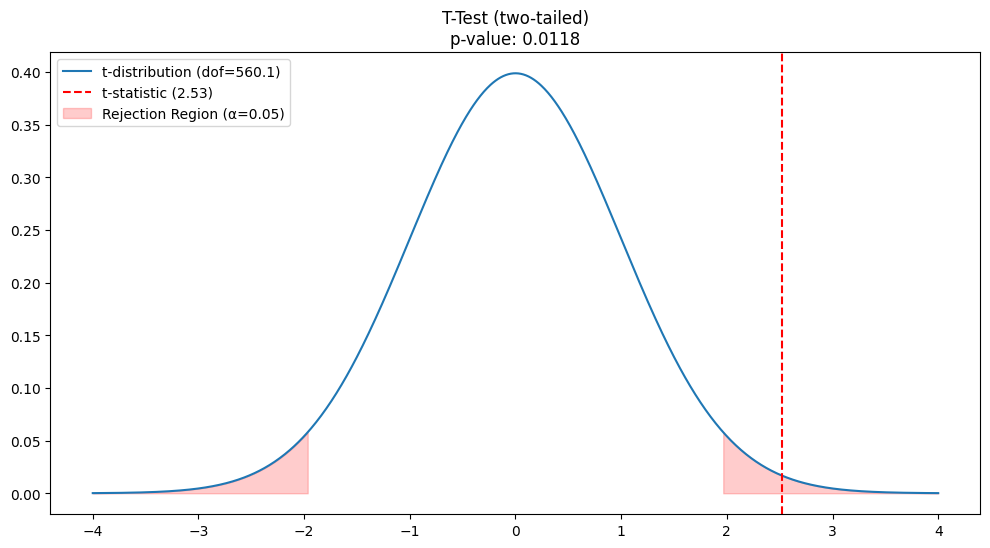


ANOVA DEMONSTRATION

3. ANOVA Results:
{'f_stat': np.float64(119.26450218450468), 'p_value': np.float64(1.6696691907693826e-31), 'eta_squared': np.float64(0.6187057307384857), 'alpha': 0.05}


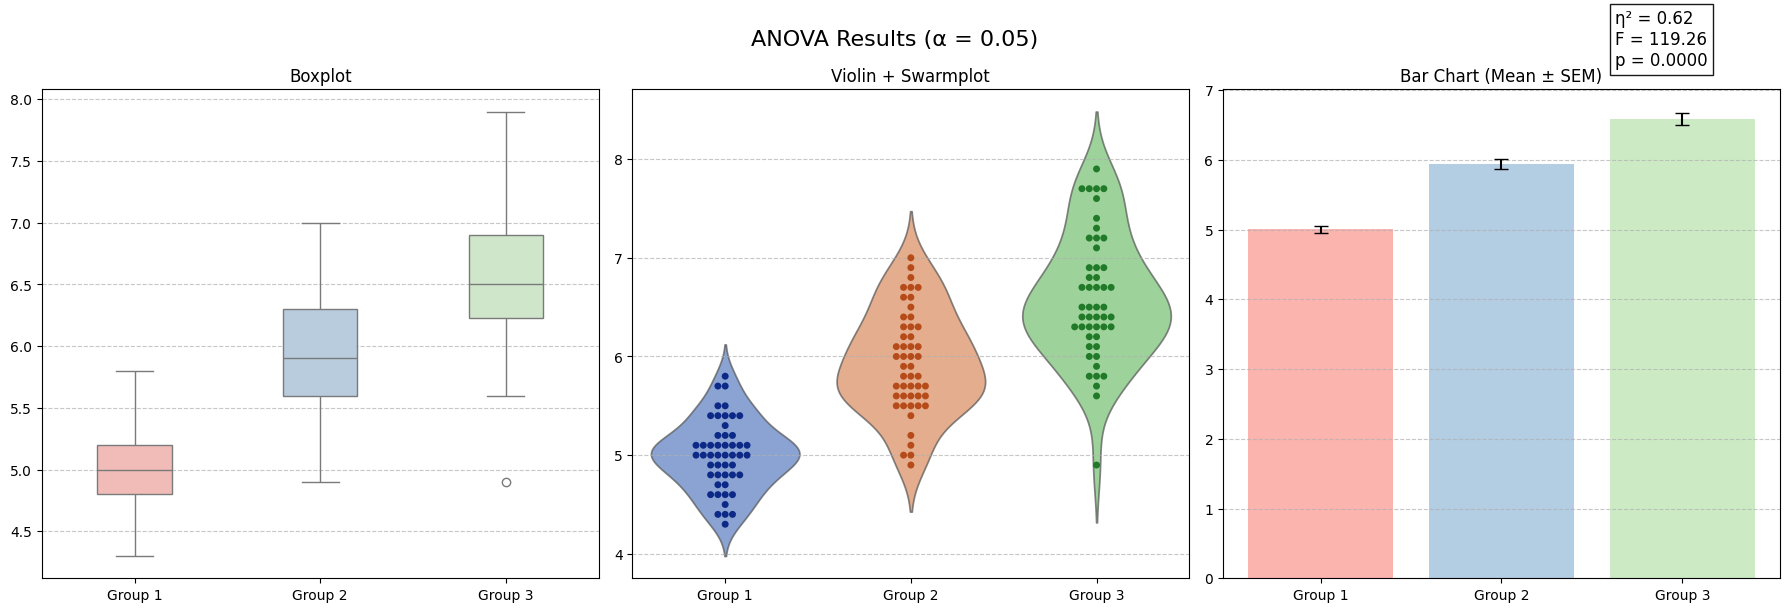


CHI-SQUARE TEST DEMONSTRATION

4. Chi-Square Test Results:
{'chi2': np.float64(260.71702016732104), 'p_value': np.float64(1.1973570627755645e-58), 'dof': 1, 'expected': array([[193.47474747, 355.52525253],
       [120.52525253, 221.47474747]]), 'phi': np.float64(0.5409359434469282), 'cramers_v': np.float64(0.5409359434469282)}


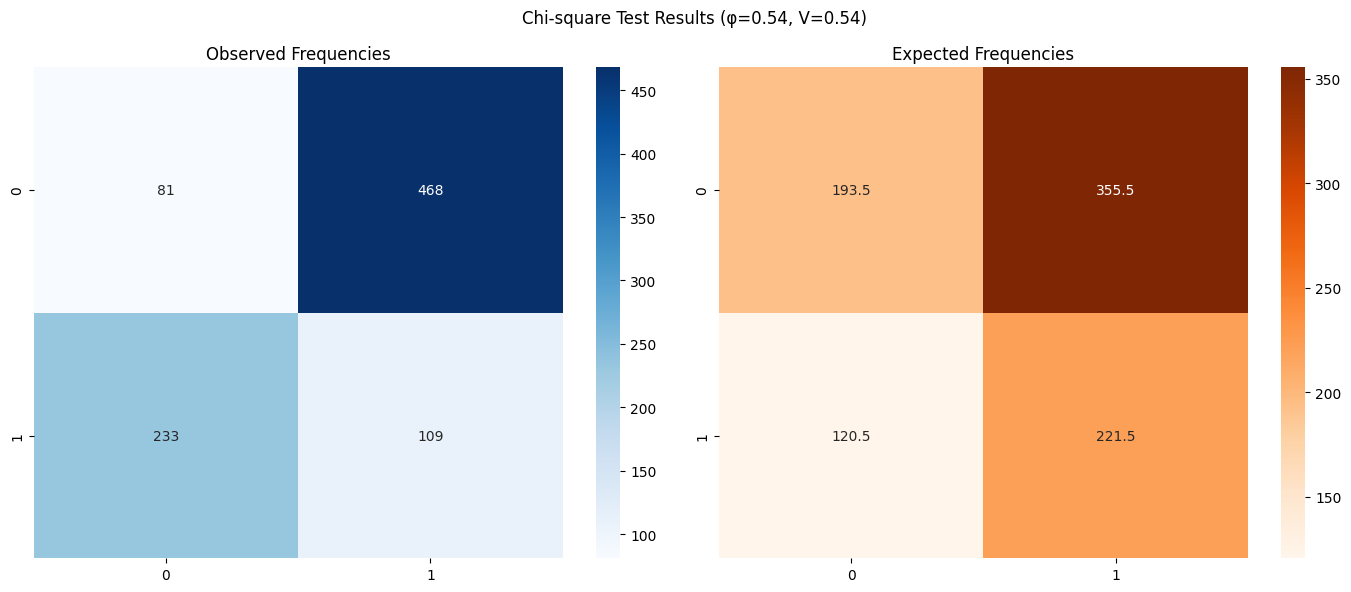

In [ ]:
if __name__ == "__main__":
    main()